# Optical character recognition (OCR)

In [ ]:
import os
import subprocess

def generate_box_files(image_folder, language='ara'):
    for file in os.listdir(image_folder):
        if file.endswith(".png"):
            image_path = os.path.join(image_folder, file)
            output_name = os.path.splitext(image_path)[0]
            subprocess.run([
                "tesseract", image_path, output_name,
                "-l", language, "--psm", "6", "batch.nochop", "makebox"
            ])
            print(f"Fichier .box généré pour : {file}")

# Dossier contenant les images
image_folder = "training_data"
generate_box_files(image_folder)


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 12.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr

import os
#os.chdir(r"C:\Users\amb\Downloads")

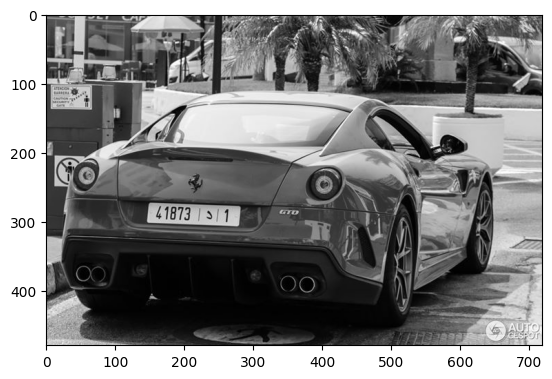

In [ ]:
img = cv2.imread("/content/sample_data/y (6).jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


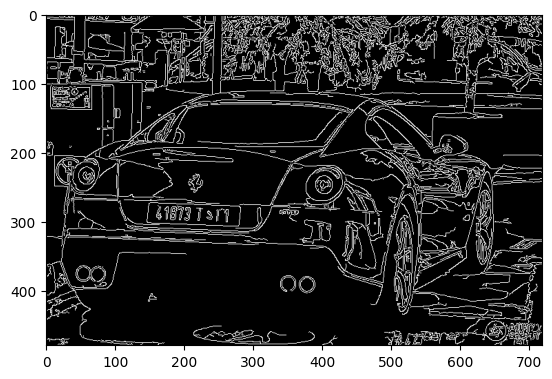

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
#print(contours)
len(contours)

10

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 9:  # Vérifie si la forme a 9 côtés
        location = approx
        break

# Vérification avant d'utiliser len(location)
if location is not None:
    print(len(location))
else:
    print("Aucune forme avec 9 côtés n'a été trouvée.")



Aucune forme avec 9 côtés n'a été trouvée.


In [ ]:
location


array([[[148, 278]],

       [[147, 302]],

       [[280, 305]],

       [[280, 278]]], dtype=int32)

In [ ]:
approx[1][0][0]

147

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

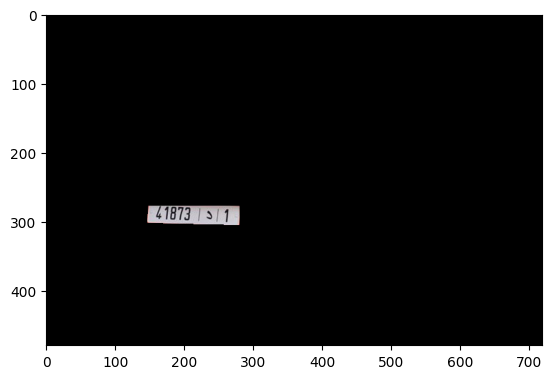

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

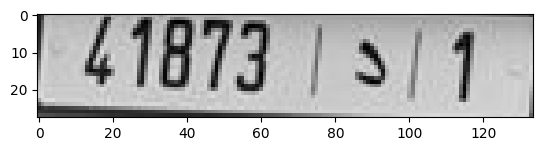

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [ ]:
reader = easyocr.Reader(['ar'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[[[[8, 0], [68, 0], [68, 26], [8, 26]], '41873', 0.57845257767129],
 [[[83, 5], [109, 5], [109, 23], [83, 23]], 'ل', 0.2485668098988194]]

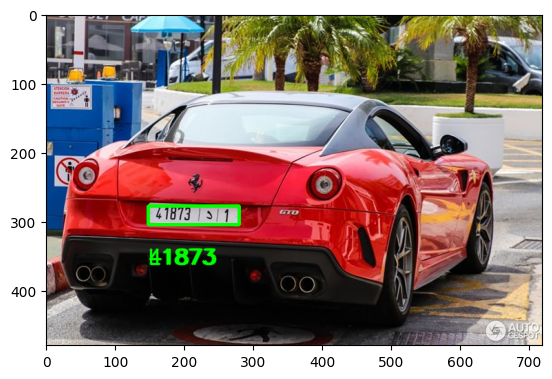

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
!pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=8462b09b32066a26be18d6100a1b1c33b12ae79fad1e3d68ac27d2f7b8d2c58b
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tesseract-ocr)
